In [1]:
import re, os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from mpl_toolkits import mplot3d 

# Data Import

In [4]:
# Take the case of data in 2012
data_ori = pd.read_csv("data.csv")
data_ori = data_ori.drop('fid',axis=1)
data_ori.head()

,fua_name,road_len,pop2012,night2012,cen_dist,city_pop_total,CLC2012
0,Acireale,0.015348,7325.648926,30.059999,2692.726152,65551.67962,1
1,Acireale,0.007960,1882.117426,20.930000,2421.478762,65551.67962,1
2,Acireale,0.006610,2574.318192,18.379999,2214.927460,65551.67962,1
3,Acireale,0.011870,7405.131897,28.459999,2092.320938,65551.67962,1
4,Acireale,0.013190,11867.653830,42.959999,2068.639445,65551.67962,1


In [5]:
data = data_ori.copy()

In [6]:
data.describe()

,road_len,pop2012,night2012,cen_dist,city_pop_total,CLC2012
count,433774.000000,433774.000000,433774.000000,433774.000000,4.337740e+05,433774.000000
mean,0.003162,460.922545,6.186208,18926.087893,9.689037e+05,6.906518
std,0.004127,1854.554564,12.586370,12508.021687,1.434181e+06,1.857292
min,0.000000,0.000000,0.000000,8.393582,5.450901e+04,1.000000
25%,0.000000,0.000000,0.520000,10137.812752,1.585278e+05,7.000000
50%,0.002076,3.497574,1.400000,16025.843740,2.276852e+05,7.000000
75%,0.004615,72.863836,5.310000,24585.104748,7.261099e+05,8.000000
max,0.044230,57586.267530,299.600006,87998.149160,4.815786e+06,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209A5D89A08>,
      dtype=object)

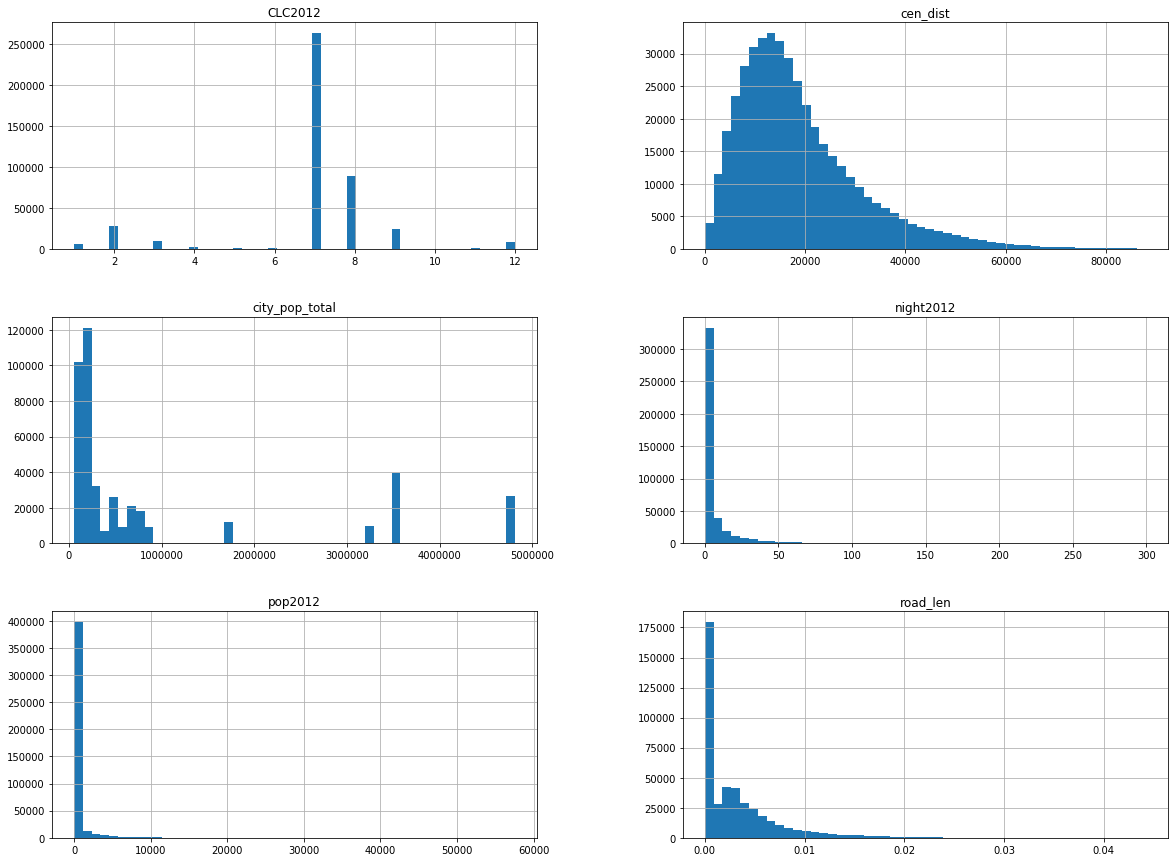

In [7]:
data.hist(bins=50,figsize=(20,15))

# Data Pre-process

In [8]:
# StandardScaler will subtract the mean from each value, then scale to the unit variance
scaler = preprocessing.MinMaxScaler()
alist = ['pop2012','night2012','road_len','cen_dist','city_pop_total']
data1 = data[alist]
data_new = scaler.fit_transform(data1.values.reshape(-1, len(alist)))
data_new = pd.DataFrame(data_new, columns=alist)

In [9]:
# Factorize the city id
data_new['land_cover'] = data['CLC2012']

In [10]:
data_new.head()

,pop2012,night2012,road_len,cen_dist,city_pop_total,land_cover
0,0.127212,0.100334,0.346998,0.030507,0.002319,1
1,0.032683,0.069860,0.179969,0.027425,0.002319,1
2,0.044704,0.061348,0.149444,0.025077,0.002319,1
3,0.128592,0.094993,0.268370,0.023684,0.002319,1
4,0.206085,0.143391,0.298220,0.023415,0.002319,1


## Data Export

In [11]:
data_new.to_csv('data_new.csv',index=False)
print('File Exported!')

File Exported!


In [12]:
data_new.head()

,pop2012,night2012,road_len,cen_dist,city_pop_total,land_cover
0,0.127212,0.100334,0.346998,0.030507,0.002319,1
1,0.032683,0.069860,0.179969,0.027425,0.002319,1
2,0.044704,0.061348,0.149444,0.025077,0.002319,1
3,0.128592,0.094993,0.268370,0.023684,0.002319,1
4,0.206085,0.143391,0.298220,0.023415,0.002319,1


In [14]:
from sklearn.utils import shuffle
data_shuf = shuffle(data_new)
data_shuf.to_csv('data_shuf.csv',index=False)
print('File Shufflled Exported!')

File Shufflled Exported!
